# Quartic multiple regression on different databases : effect of outlier on multiple regression

The best Multiple Regression with quartic interaction is trained with different databases on each output (elastic modulus E, hardness H, EBSD Confidence Index CI and Image Quality IQ) to assess the impact of data quality over the operformance of the model. 

For each output and each datasets:
 - import dataset as dataframe and compute Scheffé interaction terms for quartic multiple regression
 - iterative kfold crossvalidation on quartic multiple regression
 - return R² and MAE mean and standard deviation
 - plot MAE histogram and expected vs predicted regression on chosen number of fold and iterations

## Import libraries

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import MultipleRegression as MR
import os


## Path to datasets

In [5]:
datasets_dir=os.getenv("DATASETS_DIR")
run_dir=os.getenv("RUN_DIR")
print(datasets_dir)

None


## Effect of outliers on quartic multiple regression

### Raw data database 

#### Import database "Raw_data_corrected" and add the intercation columns

In [18]:
data=pd.read_csv(f"{datasets_dir}/Raw_data_corrected.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E 
Define X and y data and train the multiple regressions 

In [19]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)
print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.8105613684938848 +/- 0.03975571739615889
MAE= 13.973672560872131 +/- 0.8539132376491041


Plot regression between test and predicted outputs, and metric histogram

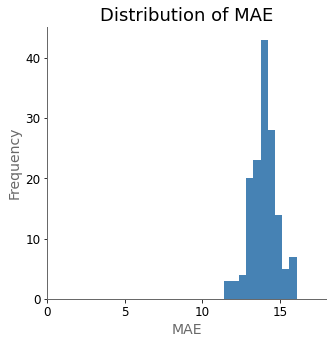

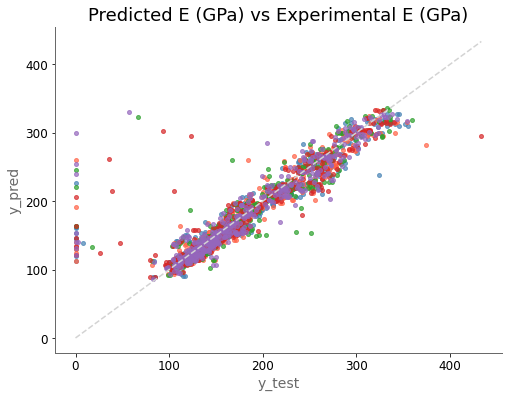

In [20]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18, 1,5, f"{run_dir}/MR/Raw_data_E_MAE.png", f"{run_dir}/MR/Raw_data_E.png")

#### For hardness H 
Define X and y data and train the multiple regressions 

In [21]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.7101189180786008 +/- 0.04617755364594785
MAE= 0.9101809802042949 +/- 0.06320428586738448


Plot regression between test and predicted outputs, and metric histogram

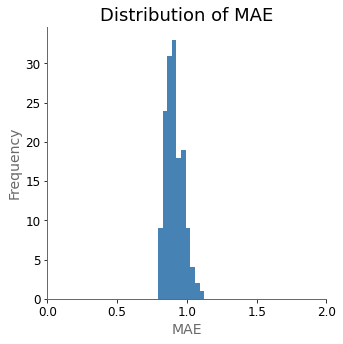

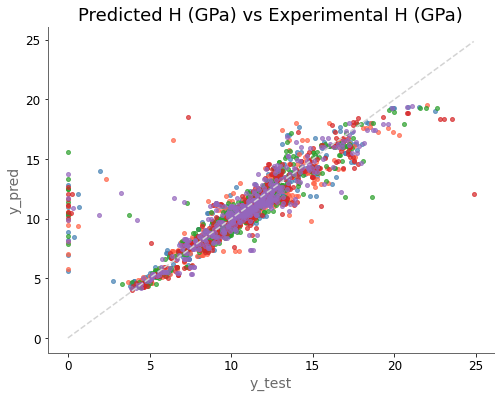

In [22]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, f"{run_dir}/MR/Raw_data_H_MAE.png", f"{run_dir}/MR/Raw_data_H.png")

### Threshold data database

#### Import database "Compo_E_H_threshold" and add the intercation columns

In [23]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_H_threshold.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E
Define X and y data and train the multiple regressions 

In [24]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9104984635807811 +/- 0.028132243587147093
MAE= 10.49311635481811 +/- 0.5993272546530058


Plot regression between test and predicted outputs, and metric histogram

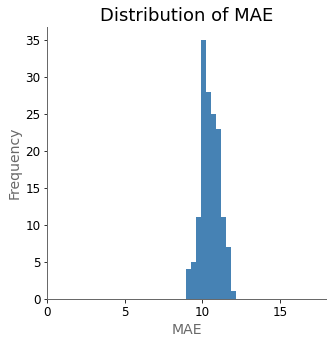

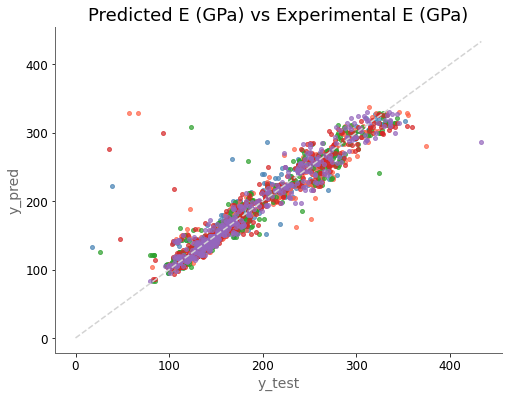

In [25]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test,0,18, 1,5, f"{run_dir}/MR/Threshold_E_MAE.png", f"{run_dir}/MR/Threshold_E.png")

#### For hardness H
Define X and y data and train the multiple regressions 

In [26]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.8473074970129677 +/- 0.03675956199868373
MAE= 0.6979368972252648 +/- 0.04327794863714675


Plot regression between test and predicted outputs, and metric histogram

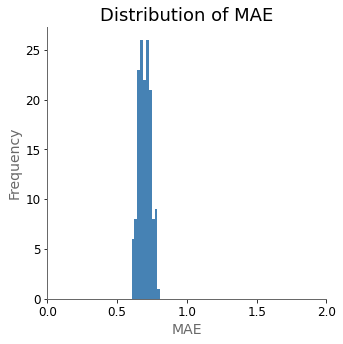

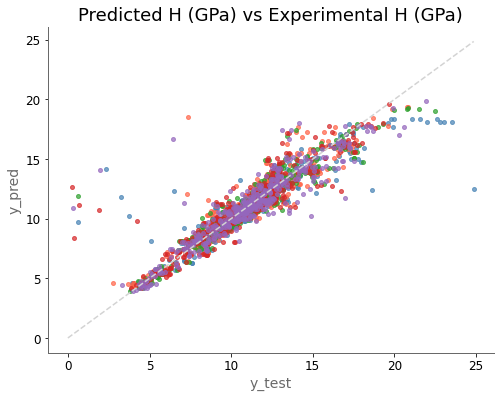

In [27]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, f"{run_dir}/MR/Threshold_H_MAE.png", f"{run_dir}/MR/Threshold_H.png")


### Statistically processed data database

#### For elastic modulus E
#### Import database "Compo_E_wo_outlier" for elastic modulus and add the intercation columns

In [28]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [29]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9506396734135628 +/- 0.009593016545813467
MAE= 9.345960163105428 +/- 0.40994590927077523


Plot regression between test and predicted outputs, and metric histogram

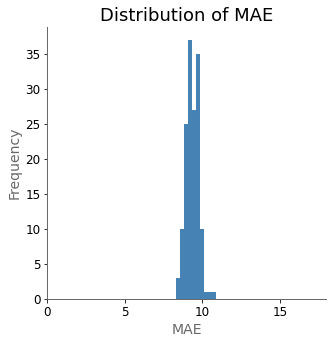

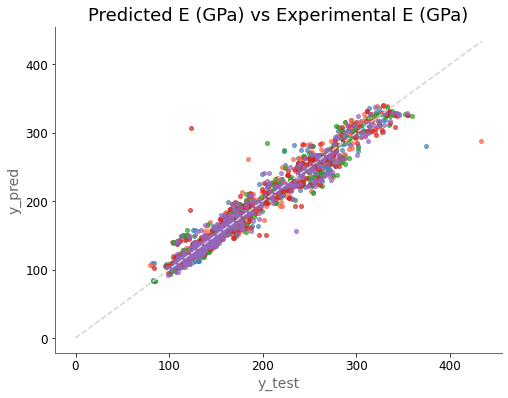

In [30]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18,1,5, f"{run_dir}/MR/No_outliers_E_MAE.png", f"{run_dir}/MR/No_outliers_E.png")


#### For hardness H
#### Import database "Compo_H_wo_outlier" for hardness and add the intercation columns

In [31]:
data=pd.read_csv(f"{datasets_dir}/Compo_H_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','H']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [32]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9159686461185336 +/- 0.012988562056552896
MAE= 0.6060873195202912 +/- 0.028399932622822303


Plot regression between test and predicted outputs, and metric histogram

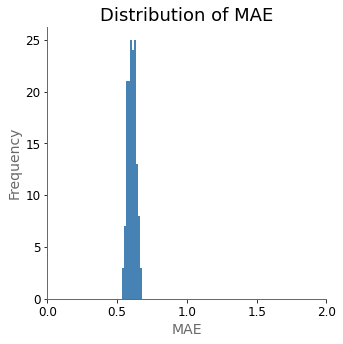

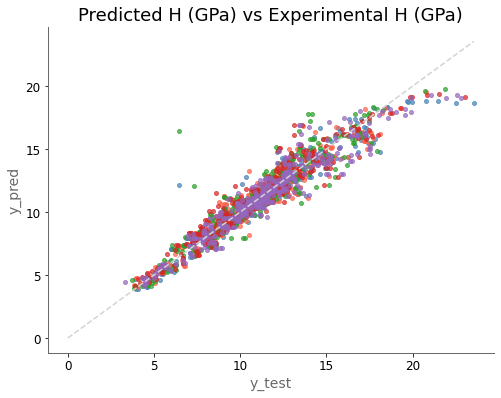

In [33]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test,0,2, 1,5, f"{run_dir}/MR/No_outliers_H_MAE.png", f"{run_dir}/MR/No_outliers_H.png")


### Data averaged database 

#### Import database "Data_averaged" and add the intercation columns

In [34]:
data=pd.read_csv(f"{datasets_dir}/Data_averaged.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E', 'H','stdE','stdH','CI','IQ','Phase']
data=MR.Scheffe_interactions_terms(data)

#### For elastic modulus E
Define X and y data and train the multiple regressions 

In [35]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'E',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9534876434241327 +/- 0.01739357256410738
MAE= 9.196909935342688 +/- 0.9140381371484695


Plot regression between test and predicted outputs, and metric histogram

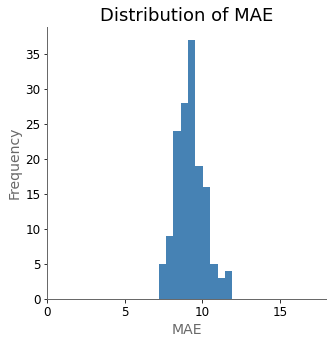

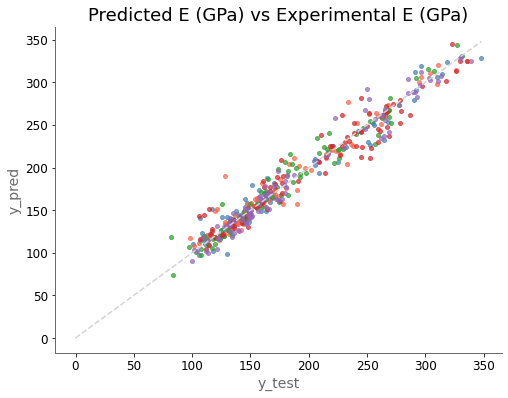

In [36]:
MR.plot_result( 'MAE', 'E (GPa)' , MAE_list, Y_pred, Y_test, 0,18, 1,5, f"{run_dir}/MR/Averaged_E_MAE.png", f"{run_dir}/MR/Averaged_E.png")

### For hardness H
Define X and y data and train the multiple regressions 

In [37]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']
model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'H',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.9060577348654135 +/- 0.02952101081393821
MAE= 0.6187127512782844 +/- 0.06443599201015458


Plot regression between test and predicted outputs, and metric histogram

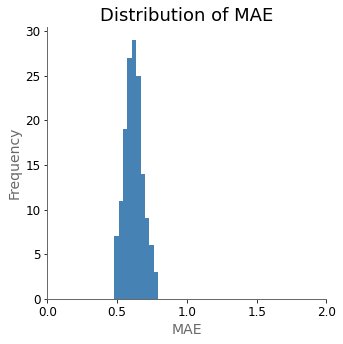

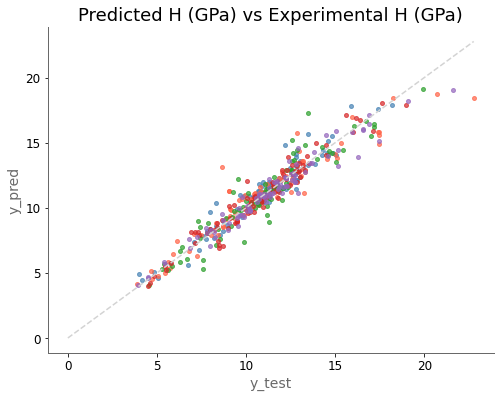

In [38]:
MR.plot_result( 'MAE', 'H (GPa)' , MAE_list, Y_pred, Y_test, 0,2, 1,5, f"{run_dir}/MR/Averaged_H_MAE.png", f"{run_dir}/MR/Averaged_H.png")

### For Confidence Index CI
Define X and y data and train the multiple regressions 

In [39]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['CI']

model,MAE_list,R2_adj_list,Y_pred,Y_test= MR.fit_outputs('CI ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'CI',X,y)

print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.8398314143615822 +/- 0.06927246049670946
MAE= 0.055409910573055284 +/- 0.007291557712061781


Plot regression between test and predicted outputs, and metric histogram

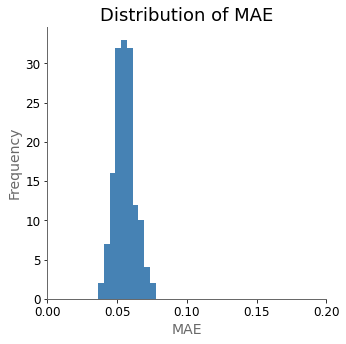

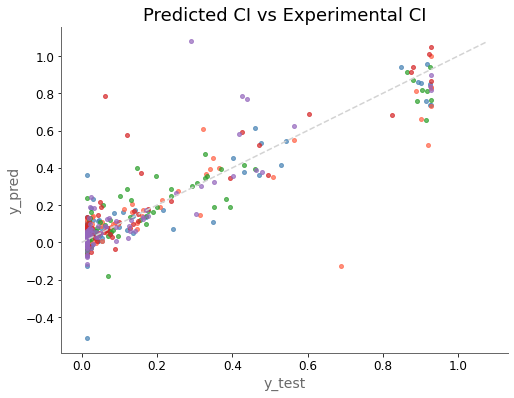

In [40]:
MR.plot_result( 'MAE', 'CI' , MAE_list, Y_pred, Y_test, 0,0.2,1,5, f"{run_dir}/MR/Averaged_CI_MAE.png", f"{run_dir}/MR/Averaged_CI.png")

### For Image Quality (IQ)
Define X and y data and train the multiple regressions 

In [41]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['IQ']

model,MAE_list, R2_adj_list,Y_pred,Y_test= MR.fit_outputs('IQ ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1',5,30,'IQ',X,y)
print('R2_adj=',np.mean(R2_adj_list),'+/-',np.std(R2_adj_list))
print('MAE=',np.mean(MAE_list),'+/-',np.std(MAE_list))

R2_adj= 0.8690669062748778 +/- 0.05317703259137479
MAE= 4781.017548915441 +/- 591.8549257695388


Plot regression between test and predicted outputs, and metric histogram

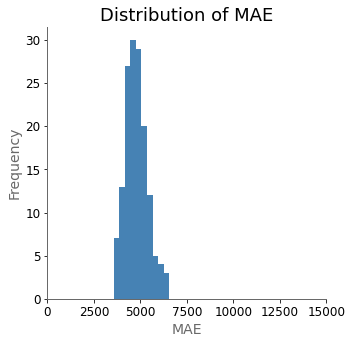

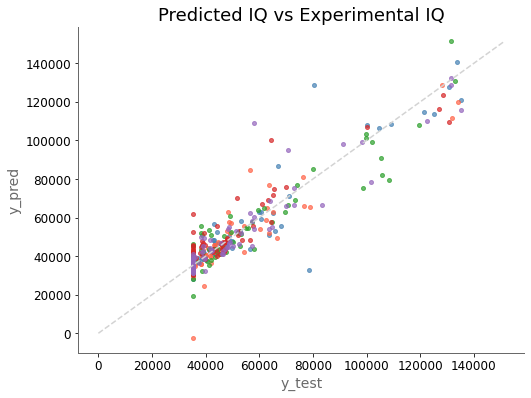

In [42]:
MR.plot_result( 'MAE', 'IQ' , MAE_list, Y_pred, Y_test,0,15000, 1,5, f"{run_dir}/MR/Averaged_IQ_MAE.png", f"{run_dir}/MR/Averaged_IQ.png")

## Regression coefficients plot for each composition or interaction terms

### For elastic modulus E
#### Import database "Compo_E_wo_outlier" and add the intercation columns


In [43]:
data=pd.read_csv(f"{datasets_dir}/Compo_E_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','E']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [44]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['E']

model_expression='E ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1'

model,MAE_list, R2_adj_list,Y_pred,Y_test=MR.fit_outputs(model_expression,5,30,'E',X,y)

Coefficients extraction and apply root on coefficient 

In [45]:
display(model.summary())
df_summary = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

# create a df_corrected too stock corrected coefficients
df_corrected=df_summary.copy()

color=[]
for i in range (0,len(df_summary)):
    #  Define color depending on p-value associated to the coefficient
    if df_summary.iloc[i,3]==0:
        color.append('green')
    elif df_summary.iloc[i,3]<0.05 :
        color.append('blue')
    else :
        color.append('w')   

    # Rules to define the number of element in the regression term: that will give the nth root to apply to the coefficient to be able to compare them
    if df_corrected.index[i].count(':')==1:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/2) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/2) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
    if df_corrected.index[i].count(':')==2:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

    if df_corrected.index[i].count(':')==3:
        if df_corrected.iloc[i,0]<0:
            df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
        else:
            df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      E   R-squared (uncentered):                   0.995
Model:                            OLS   Adj. R-squared (uncentered):              0.995
Method:                 Least Squares   F-statistic:                              4816.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:54:52   Log-Likelihood:                         -7119.9
No. Observations:                1761   AIC:                                  1.438e+04
Df Residuals:                    1691   BIC:                                  1.476e+04
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Zr             639.9427     93.629      6.835      0.000     456.301     823.585
Nb             217.7949     35.579      6.121      0.000     148.011     287.579
Mo             381.9194      8.038     47.516      0.000     366.155     397.684
Ti             -63.2310     61.633     -1.026      0.305    -184.115      57.653
Cr             258.8375      8.403     30.803      0.000     242.356     275.319
Zr:Nb         -929.9004    342.089     -2.718      0.007   -1600.864    -258.937
Zr:Mo        -2131.9276    255.320     -8.350      0.000   -2632.705   -1631.150
Zr:Ti        -1532.2574    445.888     -3.436      0.001   -2406.808    -657.707
Zr:Cr        -1831.6590    230.248     -7.955      0.000   -2283.260   -1380.058
Nb:Mo         -261.9498     70.608     -3.710      0.000    -400.439    -123.461
Nb:Ti        -1344.6010    224.938     -5.978      0.000   -1785.787    -903.415
Nb:Cr         -720.3312    111.900     -6.437      0.000    -939.808    -500.855
Mo:Ti         -181.9413    145.155     -1.253      0.210    -466.645     102.762
Mo:Cr          542.7395     58.384      9.296      0.000     428.227     657.252
Ti:Cr          -21.3527    236.201     -0.090      0.928    -484.630     441.925
Zr:Nb:Zr_Nb  -1519.1041    950.075     -1.599      0.110   -3382.550     344.342
Zr:Mo:Zr_Mo  -2447.8991   1118.074     -2.189      0.029   -4640.853    -254.946
Zr:Ti:Zr_Ti  -2096.8713   1027.271     -2.041      0.041   -4111.728     -82.015
Zr:Cr:Zr_Cr  -1750.4761    717.156     -2.441      0.015   -3157.082    -343.870
Nb:Mo:Nb_Mo    179.1649    115.656      1.549      0.122     -47.680     406.010
Nb:Ti:Nb_Ti   -219.0924    667.730     -0.328      0.743   -1528.757    1090.572
Nb:Cr:Nb_Cr   -771.4567    261.812     -2.947      0.003   -1284.966    -257.948
Mo:Ti:Mo_Ti   -306.2385    587.589     -0.521      0.602   -1458.717     846.240
Mo:Cr:Mo_Cr    603.5620    142.674      4.230      0.000     323.726     883.398
Ti:Cr:Ti_Cr    386.2213    415.363      0.930      0.353    -428.458    1200.901
Zr:Nb:Mo:Ti  -2701.0799   2291.772     -1.179      0.239   -7196.087    1793.927
Zr:Nb:Mo:Cr  -2220.8514   1576.088     -1.409      0.159   -5312.140     870.437
Zr:Nb:Ti:Cr   2776.3913   1738.981      1.597      0.111    -634.391    6187.173
Zr:Mo:Ti:Cr  -9209.9258   1612.711     -5.711      0.000   -1.24e+04   -6046.807
Nb:Mo:Ti:Cr  -2763.4328   1106.004     -2.499      0.013   -4932.713    -594.152
Zr2:Nb:Mo     9417.6789   3424.252      2.750      0.006    2701.461    1.61e+04
Zr2:Nb:Ti     3033.2317   7779.684      0.390      0.697   -1.22e+04    1.83e+04
Zr2:Nb:Cr     1.682e+04   3713.346      4.530      0.000    9536.653    2.41e+04
Zr2:Mo:Ti     1.961e+04   5654.227      3.468      0.001    8520.809

Plot coefficients 

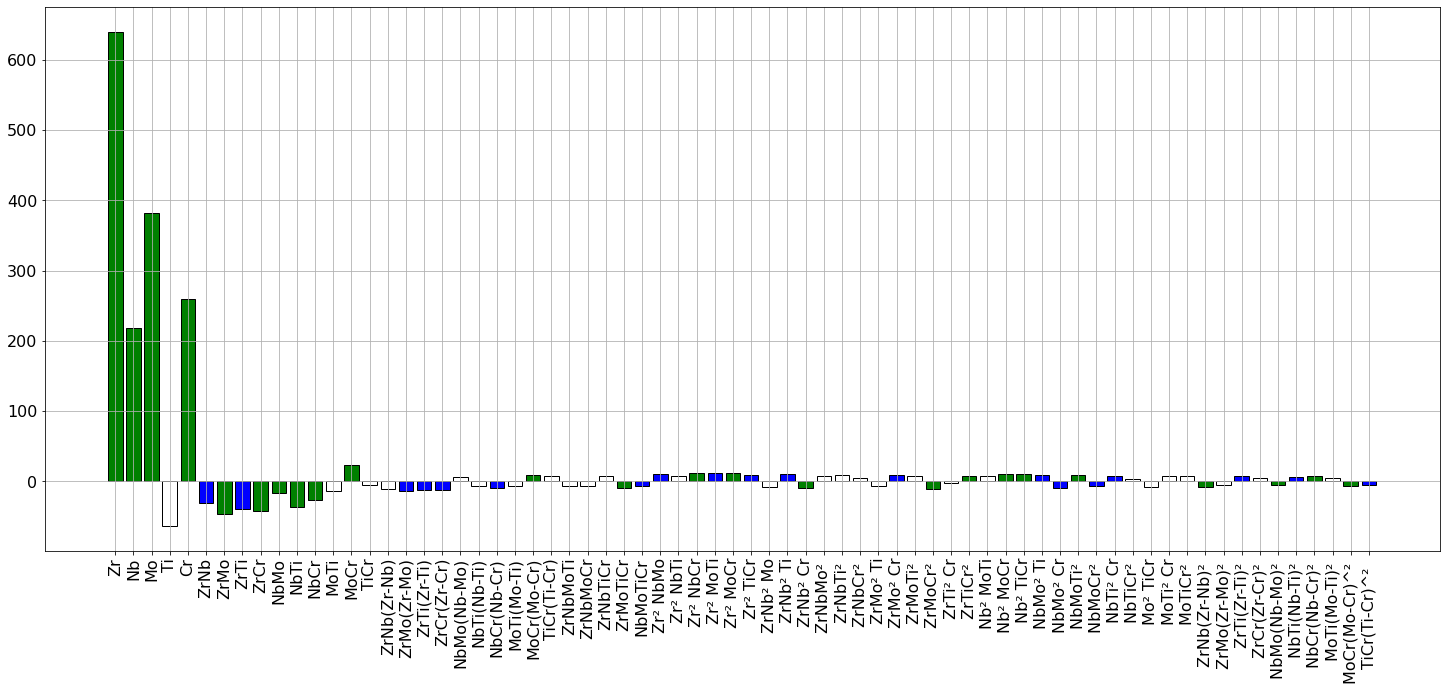

In [46]:
fig=plt.figure(figsize=(25,10))
plt.rcParams.update({'font.size': 16})
ax = fig.add_subplot(111)
x_pos=np.linspace(1,len(df_corrected),len(df_corrected))
ind=pd.read_csv('index_regr_multi.csv')
ind=ind['indice'].to_list()
plt.xticks(x_pos, ind)
plt.bar(x_pos,df_corrected['coef'].values, color=color,edgecolor='black')
ax.set_xticklabels(ind, rotation = 90)
plt.grid()
plt.savefig(f"{run_dir}/MR/interactions_E.png", dpi=300, bbox_inches='tight')
plt.show()
#df.to_csv('coeff_regre_multi.csv')
#df_corrected.to_csv('coeff_regre_multi_corr.csv')

### For hardness H
#### Import database "Compo_H_wo_outlier" and add the intercation columns

In [47]:
data=pd.read_csv(f"{datasets_dir}/Compo_H_wo_outlier.csv", header=0)
data.columns=['compo','sample','Zr', 'Nb','Mo','Ti','Cr','Zr_m','Nb_m','Mo_m','Ti_m','Cr_m','H']
data=MR.Scheffe_interactions_terms(data)

Define X and y data and train the multiple regressions 

In [48]:
X=data[['Zr','Nb','Mo','Ti','Cr','Zr_Nb','Zr_Mo','Zr_Ti','Zr_Cr','Nb_Mo','Nb_Ti','Nb_Cr','Mo_Ti','Mo_Cr','Ti_Cr','Zr2','Nb2','Mo2','Ti2','Cr2','Zr_Nb2','Zr_Mo2','Zr_Ti2','Zr_Cr2','Nb_Mo2','Nb_Ti2','Nb_Cr2','Mo_Ti2','Mo_Cr2','Ti_Cr2']]
y= data['H']

model_expression='H ~ Zr + Nb + Mo + Ti + Cr + Zr:Nb +Zr:Mo +Zr:Ti +Zr:Cr +Nb:Mo +Nb:Ti +Nb:Cr +Mo:Ti + Mo:Cr + Ti:Cr + Zr:Nb:Zr_Nb +Zr:Mo:Zr_Mo + Zr:Ti:Zr_Ti+ Zr:Cr:Zr_Cr + Nb:Mo:Nb_Mo +Nb:Ti:Nb_Ti +Nb:Cr:Nb_Cr +Mo:Ti:Mo_Ti + Mo:Cr:Mo_Cr + Ti:Cr:Ti_Cr + Zr:Nb:Mo:Ti + Zr:Nb:Mo:Cr + Zr:Nb:Ti:Cr + Zr:Mo:Ti:Cr + Nb:Mo:Ti:Cr + Zr2:Nb:Mo +Zr2:Nb:Ti +Zr2:Nb:Cr +Zr2:Mo:Ti +Zr2:Mo:Cr +Zr2:Ti:Cr + Zr:Nb2:Mo + Zr:Nb2:Ti +Zr:Nb2:Cr + Zr:Nb:Mo2 + Zr:Nb:Ti2 +Zr:Nb:Cr2 + Zr:Mo2:Ti + Zr:Mo2:Cr + Zr:Mo:Ti2 + Zr:Mo:Cr2 + Zr:Ti2:Cr + Zr:Ti:Cr2 + Nb2:Mo:Ti + Nb2:Mo:Cr + Nb2:Ti:Cr + Nb:Mo2:Ti + Nb:Mo2:Cr +  Nb:Mo:Ti2 + Nb:Mo:Cr2 + Nb:Ti2:Cr + Nb:Ti:Cr2 + Mo2:Ti:Cr +Mo:Ti2:Cr + Mo:Ti:Cr2 + Zr:Nb:Zr_Nb2 +Zr:Mo:Zr_Mo2 + Zr:Ti:Zr_Ti2+ Zr:Cr:Zr_Cr2 + Nb:Mo:Nb_Mo2 +Nb:Ti:Nb_Ti2 +Nb:Cr:Nb_Cr2 +Mo:Ti:Mo_Ti2 + Mo:Cr:Mo_Cr2 + Ti:Cr:Ti_Cr2 -1'

model,MAE_list, R2_adj_list,Y_pred,Y_test=MR.fit_outputs(model_expression,5,30,'H',X,y)

Coefficients extraction and apply root on coefficient 

In [49]:
display(model.summary())
df_summary = pd.read_html(model.summary().tables[1].as_html(),header=0,index_col=0)[0]

# create a df_corrected too stock corrected coefficients
df_corrected=df_summary.copy()

color=[]
for i in range (0,len(df_summary)):
    #  Define color depending on p-value associated to the coefficient
    if df_summary.iloc[i,3]==0:
        color.append('green')
    elif df_summary.iloc[i,3]<0.05 :
        color.append('blue')
    else :
        color.append('w')    

    # Rules to define the number of element in the regression term: that will give the nth root to apply to the coefficient to be able to compare them
    if df_corrected.index[i].count(':')==1:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/2) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/2) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
    if df_corrected.index[i].count(':')==2:
        if df_corrected.index[i].count('2')==0:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/3) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/3) 
        if df_corrected.index[i].count('2')==1:
            if df_corrected.iloc[i,0]<0:
                df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
            else:
                df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

    if df_corrected.index[i].count(':')==3:
        if df_corrected.iloc[i,0]<0:
            df_corrected.iloc[i,0]=(-1)*np.abs(df_corrected.iloc[i,0])**(1/4) 
        else:
            df_corrected.iloc[i,0]=df_corrected.iloc[i,0]**(1/4) 

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      H   R-squared (uncentered):                   0.994
Model:                            OLS   Adj. R-squared (uncentered):              0.994
Method:                 Least Squares   F-statistic:                              4230.
Date:                Wed, 16 Feb 2022   Prob (F-statistic):                        0.00
Time:                        11:55:13   Log-Likelihood:                         -2203.6
No. Observations:                1741   AIC:                                      4547.
Df Residuals:                    1671   BIC:                                      4930.
Df Model:                          70                                                  
Covariance Type:            nonrobust                                                  
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Zr              13.3073      5.402      2.463      0.014       2.712      23.903
Nb               9.9915      2.208      4.525      0.000       5.661      14.322
Mo               8.4164      0.541     15.547      0.000       7.355       9.478
Ti              -8.5980      3.508     -2.451      0.014     -15.479      -1.717
Cr               7.9333      0.556     14.258      0.000       6.842       9.025
Zr:Nb           -7.1304     20.499     -0.348      0.728     -47.337      33.076
Zr:Mo          -32.4021     14.832     -2.185      0.029     -61.494      -3.310
Zr:Ti          218.5877     26.808      8.154      0.000     166.006     271.169
Zr:Cr           73.8959     14.286      5.172      0.000      45.875     101.917
Nb:Mo           20.8265      4.367      4.769      0.000      12.261      29.392
Nb:Ti           11.9681     12.797      0.935      0.350     -13.132      37.069
Nb:Cr           73.3111      6.596     11.115      0.000      60.375      86.247
Mo:Ti           51.1481      8.452      6.052      0.000      34.570      67.726
Mo:Cr           14.0699      3.640      3.865      0.000       6.930      21.209
Ti:Cr          130.5483     14.434      9.044      0.000     102.237     158.859
Zr:Nb:Zr_Nb   -184.4069     55.276     -3.336      0.001    -292.825     -75.989
Zr:Mo:Zr_Mo   -382.0720     65.370     -5.845      0.000    -510.289    -253.856
Zr:Ti:Zr_Ti    408.6688     60.616      6.742      0.000     289.777     527.560
Zr:Cr:Zr_Cr    295.9693     43.970      6.731      0.000     209.726     382.212
Nb:Mo:Nb_Mo    -52.9511      7.113     -7.444      0.000     -66.903     -38.999
Nb:Ti:Nb_Ti    200.0062     41.820      4.783      0.000     117.980     282.032
Nb:Cr:Nb_Cr    125.8538     16.219      7.759      0.000      94.041     157.666
Mo:Ti:Mo_Ti   -269.9331     36.468     -7.402      0.000    -341.461    -198.406
Mo:Cr:Mo_Cr    -94.8178      8.769    -10.813      0.000    -112.017     -77.618
Ti:Cr:Ti_Cr     75.8422     25.362      2.990      0.003      26.097     125.587
Zr:Nb:Mo:Ti   -218.7256    138.129     -1.583      0.113    -489.649      52.198
Zr:Nb:Mo:Cr   -312.5266     97.436     -3.207      0.001    -503.637    -121.417
Zr:Nb:Ti:Cr   -229.7703    109.555     -2.097      0.036    -444.650     -14.891
Zr:Mo:Ti:Cr     -1.6335     99.819     -0.016      0.987    -197.417     194.150
Nb:Mo:Ti:Cr   -708.8012     67.928    -10.435      0.000    -842.034    -575.569
Zr2:Nb:Mo       83.3263    209.496      0.398      0.691    -327.576     494.228
Zr2:Nb:Ti      673.9985    477.990      1.410      0.159    -263.524    1611.521
Zr2:Nb:Cr    -1553.1354    229.304     -6.773      0.000   -2002.890   -1103.381
Zr2:Mo:Ti    -1759.9465    346.107     -5.085      0.000   -2438.795

Plot coefficients 

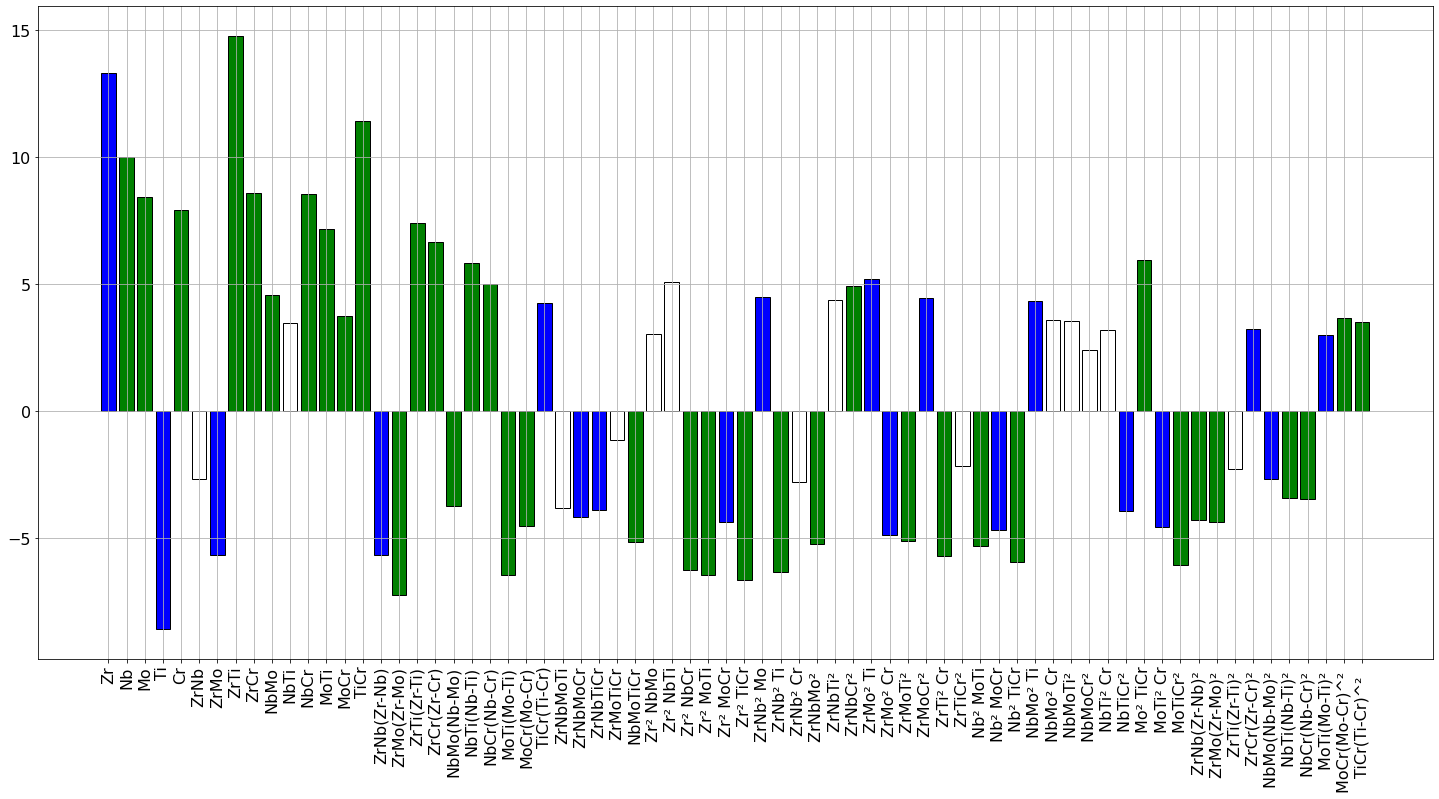

In [50]:
fig=plt.figure(figsize=(25,12))
plt.rcParams.update({'font.size': 16})
ax = fig.add_subplot(111)
x_pos=np.linspace(1,len(df_corrected),len(df_corrected))
ind=pd.read_csv('index_regr_multi.csv')
ind=ind['indice'].to_list()
plt.xticks(x_pos, ind)
plt.bar(x_pos,df_corrected['coef'].values, color=color,edgecolor='black')
ax.set_xticklabels(ind, rotation = 90)
plt.grid()
plt.savefig(f"{run_dir}/MR/interactions_H.png", dpi=300, bbox_inches='tight')
plt.show()

#df.to_csv('coeff_regre_multi.csv')
#df_corrected.to_csv('coeff_regre_multi_corr.csv')